<a href="https://colab.research.google.com/github/arvindhvasu/GL_Pneumonia_Detection/blob/master/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stage 1 : Pre-Processing,Data Visualization,EDA**

1. Pre-Processing, Data Visualization, EDA
2. Dealing with missing values
3. Exploring the given Data files, classes and images of different classes.
4. Visualization of different classes
5. Analysis from the visualization of different classes.


## **Mount the Dataset from the drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the necessary libraries for pre-processing 

*   **Pandas** - for data structures & data analysis
*   **Numpy** - for computing with array objects
*   **Scikitlearn**- for pre-preprocessing & prediction
*   **Matplotlib** - for plotting tool library
*   **Seaborn** - for data visualization

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [8]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

# **Extracting & Loading the pneumonia dataset**

In [0]:
# importing required modules 
from zipfile import ZipFile

In [0]:
# specifying the zip file name 
capstone_project = "/content/drive/My Drive/Capstone/rsna-pneumonia-detection-challenge.zip"

In [0]:
# opening the zip file in READ mode 
with ZipFile(capstone_project, 'r') as zip: 
    # extracting all the files 
    zip.extractall()
   

In [0]:
#Set your project path 
capstone_project =  '/content/drive/My Drive/Capstone/rsna-pneumonia-detection-challenge.zip'
#Load the py file for common functions
#!python3 "/content/drive/My Drive/Capstone/rsna-pneumonia-detection-challenge.zip/common.py"

In [39]:
arr = os.listdir(capstone_project+'/dataset')
print(arr)

NotADirectoryError: ignored

In [12]:
pd.read_csv('/content/stage_2_detailed_class_info.csv')

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


## **Reading through the different classes of pneumonia to understand the Target Variable**

*   **No Lung Opacity/ Not Normal:** No Pneumonia but some abnormality observed
*   **Normal:** No Pneumonia observed
*   **Lung Opacity:** Pneumonia observed 

## **Reading through the Class Dataset**

In [0]:
df_class_info=pd.read_csv('/content/stage_2_detailed_class_info.csv')

In [14]:
df_class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [15]:
df_class_info.describe(include='all')

,patientId,class
count,30227,30227
unique,26684,3
top,1c44e0a4-4612-438f-9a83-8d5bf919cb67,No Lung Opacity / Not Normal
freq,4,11821


In [16]:
df_class_info['patientId'].value_counts()

1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
7d674c82-5501-4730-92c5-d241fd6911e7    4
32408669-c137-4e8d-bd62-fe8345b40e73    4
1bf08f3b-a273-4f51-bafa-b55ada2c23b5    4
                                       ..
0b04562b-ea31-455d-a729-106264dc170b    1
b73e28fb-9068-4949-b4b1-8d7815cd4af5    1
90b9853e-22a6-4d53-bcf1-94377fbc383b    1
d892dc96-5d2e-494e-b48d-a9f5c49f0fcb    1
547e4274-c773-4f1d-b032-e65b9a6ebecc    1
Name: patientId, Length: 26684, dtype: int64

Patient ID abov gives the unique identies to different classes of pneumonia in the present data set - **No Lung Opacity / Not Normal,Lung Opacity,Normal**


## **Reading through the Train Labels Dataset**

In [0]:
df_train_labels=pd.read_csv('/content/stage_2_train_labels.csv')

In [18]:
df_train_labels.shape


(30227, 6)

In [19]:
df_train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


Dataset has impressions of NaN present in few columns as Missing values which would need to be handled for model building & tuning 
understanding from the data set is as below:
Target 0 : No Pneumonia
Target 1 : Pneumonia 
All rows with columns X to width (L-R) have NaN which means patients with NaN, they dont have pneumonia while the ones with the value 1 or more than 1 are the areas of pneumonia detected. 

## **2. Dealing with missing values**
No Missing values in the dataset present which require changes the "NAN" present are a part of the data set

In [20]:
df_train_labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

**To count the instances of each class in the data to check if data is skewed towards a class**

In [21]:
df_train_labels.groupby(["Target"]).count() 

,patientId,x,y,width,height
Target,,,,,
0,20672,0,0,0,0
1,9555,9555,9555,9555,9555


**Target 0 : No Pneumonia Target 1 : Pneumonia/abnormal syptoms**


In [22]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


**Descriptive statistics of each of the attributes**

In [23]:
df_train_labels.describe(include='all')

,patientId,x,y,width,height,Target
count,30227,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
unique,26684,NaN,NaN,NaN,NaN,NaN
top,1c44e0a4-4612-438f-9a83-8d5bf919cb67,NaN,NaN,NaN,NaN,NaN
freq,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,394.047724,366.839560,218.471376,329.269702,0.316108
std,NaN,204.574172,148.940488,59.289475,157.750755,0.464963
min,NaN,2.000000,2.000000,40.000000,45.000000,0.000000
25%,NaN,207.000000,249.000000,177.000000,203.000000,0.000000
50%,NaN,324.000000,365.000000,217.000000,298.000000,0.000000
75%,NaN,594.000000,478.500000,259.000000,438.000000,1.000000


In [24]:
df_train_labels.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target'], dtype='object')

In [0]:
for feature in df_train_labels.columns: # Loop through all columns in the dataframe
    if df_train_labels[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_train_labels[feature] = pd.Categorical(df_train_labels[feature]).codes # Replace strings with an integer

In [26]:
df_train_labels.groupby("Target").count()

,patientId,x,y,width,height
Target,,,,,
0,20672,0,0,0,0
1,9555,9555,9555,9555,9555


In [27]:
df_train_labels[df_train_labels['Target'] == 1]

,patientId,x,y,width,height,Target
4,16,264.0,152.0,213.0,379.0,1
5,16,562.0,152.0,256.0,453.0,1
8,24,323.0,577.0,160.0,104.0,1
9,24,695.0,575.0,162.0,137.0,1
14,34,288.0,322.0,94.0,135.0,1
...,...,...,...,...,...,...
30220,19460,316.0,504.0,179.0,273.0,1
30221,19461,609.0,464.0,240.0,284.0,1
30222,19461,185.0,298.0,228.0,379.0,1
30225,19464,570.0,393.0,261.0,345.0,1


**Pneumonia Identified with Target value as 1**

**To understand the classes division in terms of number**


In [28]:
df_class_info['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [29]:
round((df_class_info['class'].value_counts()/len(df_class_info.index) * 100),2)

No Lung Opacity / Not Normal    39.11
Lung Opacity                    31.61
Normal                          29.28
Name: class, dtype: float64

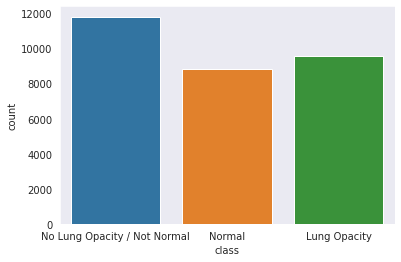

In [30]:
sns.countplot(df_class_info['class'])

“**Merging” two datasets is the process of bringing two datasets together into one & aligning the rows from each based on common attributes or columns,The words “merge” & “join” are used relatively interchangeably in Pandas & other language**s

Merging two datasets "

In order to work with the Medical images that are stored in a special format called DICOM files - (*Dcm),we would need to install the package "pydicom"to create an understanding of the image type & gives the opportunity to further explore it

In [31]:
pip install pydicom

     |████████████████████████████████| 35.5MB 121kB/s 


In [32]:
import pydicom, glob, pylab
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

patientId = df_class_info['patientId'][1] #No lung opacity/ Not normal
dcm_train = '/content/stage_2_train_images/%s.dcm' % patientId
dcm_med = pydicom.read_file(dcm_train)
print(dcm_med)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

**OS module in python provides functions for interacting with the operating system,OS.listdir() method in python is used to get the list of all files and directories in the specified directory**

In [33]:
import os
train_images = os.listdir('/content/stage_2_train_images')
test_images = os.listdir('/content/stage_2_test_images')

print("No. of train images:", len(train_images))
print("No. of test images:", len(test_images))

No. of train images: 26684
No. of test images: 3000


In [0]:
def display_images(data):
    img_data = list(data.T.to_dict().values())
    #img_data = list(data)
    f, ax = plt.subplots(1,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        imageName = data_row['patientId']+'.dcm'
        imagePath = os.path.join("/content/stage_2_train_images",imageName)
        data_row_img = dcm.dcmread(imagePath)
        ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i%3].axis('off')
        ax[i%3].set_title('ID: {}\nClass: {}'.format(
                data_row['patientId'], data_row['class']))
    plt.show()